In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
def plot_accuracy(x, y, name):
    plt.plot(x, y)
    plt.xlabel('num_samples')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.show()

In [3]:
# # returns plot of error rate
# def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
#     error = list() # need error to be an array in order to plot it (See matplotlib.pyplot)
#     print('Training ' + name + '\n')
#     for sample_size in samples:
#         clf.fit(train_set[:sample_size], train_y[:sample_size])
#         y_hat = clf.predict(valid_set)
#         error.append(accuracy_score(valid_y, y_hat))
#     plot_accuracy(samples, error, name)

In [4]:
# returns plot of error rate
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    train_error = list()
    valid_error = list()
    for sample_size in samples:
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        train_error.append(clf.score(train_set, train_y))
        valid_error.append(clf.score(valid_set, valid_y))
    plot_accuracy(samples, train_error, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
    return valid_error

In [5]:
# loading matlab file
# returns dictionary with variable names as keys and matrix as values
mnist_dict = io.loadmat('mnist/train.mat')

In [6]:
# ***********************PROBLEM 1 --> VALIDATION SETS***********************

# -----------MNIST SET--------
# get the matrix
mnist_trainX = mnist_dict['trainX']

#shuffle matrix
np.random.shuffle(mnist_trainX)
num_points_mnist = mnist_trainX.shape[0] 
mnist_valid_set = mnist_trainX[:10000, :-1] 
mnist_valid_y = mnist_trainX[:10000, -1] 
mnist_train_set = mnist_trainX[10000:, :-1] 
mnist_train_y = mnist_trainX[10000:, -1]

In [ ]:
# ---------------CIFAR-10 SET----------------
cifar_dict = sp.io.loadmat('cifar/train.mat')

cifar_trainX = cifar_dict['trainX']

np.random.shuffle(cifar_trainX)
cifar_valid_set = cifar_trainX[:5000, :-1] 
cifar_valid_y = cifar_trainX[:5000, -1] 
cifar_train_set = cifar_trainX[5000:, :-1] 
cifar_train_y = cifar_trainX[5000:, -1]

(5000,)
(5000, 3072)
(45000,)
(45000, 3072)
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# --------------SPAM DataSet----------------
spam_dict = sp.io.loadmat('spam/spam_data.mat')


spam_trainX = spam_dict['training_data']


np.random.shuffle(spam_trainX)
spam_valid_set = spam_trainX[:1034, :-1] 
spam_valid_y = spam_trainX[:1034, -1] 
spam_train_set = spam_trainX[1034:, :-1] 
spam_train_y = spam_trainX[1034:, -1]

Training MNIST



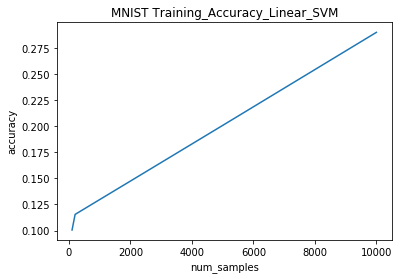

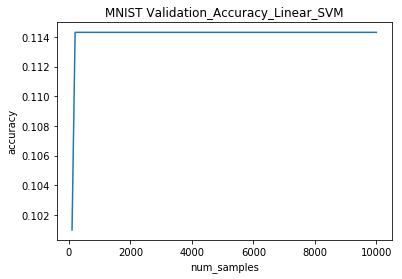

In [11]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************

# ----------TRAIN MNIST DATA------------#

clf_mnist = SVC()
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')

In [ ]:
# -----------TRAIN CIFAR DATA-----------#

clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# # expect between 25-35% accuracy
train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')

Training SPAM



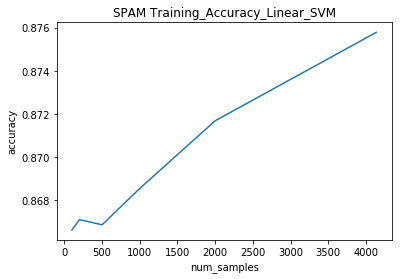

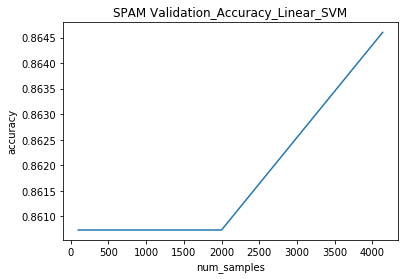

In [10]:
# ----------TRAIN SPAM DATA -------------
clf_spam = SVC()
experiments = [100, 200, 500, 1000, 2000, 4137]
train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')

Training MNIST)



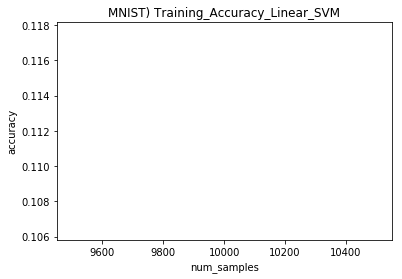

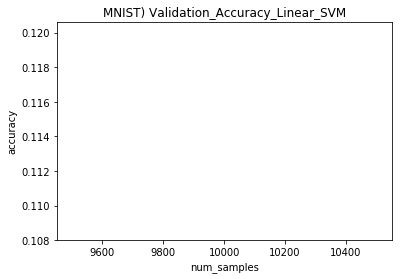

Training MNIST)



In [12]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = np.logspace(-50, 10)
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(C=C)
    train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST)')

In [ ]:
# ***************************** PROBLEM 4 K-FOLD CROSS VALIDATION *******************

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
np.random.shuffle(spam_trainX)
scores = cross_val_score(clf, spam_trainX[:, :-1], spam_trainX[:, -1], cv=5)
print(scores)

/Users/maialena/anaconda/envs/189hw/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[ 0.84313725  0.8560794   0.86934673  0.86649874  0.87055838]


In [ ]:
from sklearn.svm import SVC

np.random.shuffle(spam_trainX)
for i in range(5):
    k_arrays = np.split(spam_trainX, 5)
    copy_data = k_arrays[:]
    valid_data = copy_data[i]
    train_data = np.concatenate(copy_data.pop(i), axis=0)
    valid_data_y = valid_data[:, -1]
    valid_data_set = valid_data[:, :-1]
    train_data_y = train_data[:, -1]
    train_data_set = train_data[:, :-1]
    valid_error = train_svm([5172], train_data_set, train_data_y, valid_data_set, valid_data_y, 'SPAM')
    

In [ ]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# from sklearn import svm
# #create four classifers
# #in the constructor for the svc you need to make sure it's a binary classifier
# clf1 = svm.SVC()
# clf2 = svm.SVC()
# clf3 = svm.SVC()
# clf4 = svm.SVC()
# 
# #add extra models to increase the hamming distance, get more room for errors
# 
# #fit the data X to the labels yi where yi = {0,1}
# #binary classifer
# #this comes after you build y1, y2, y3, y4
# clf1.fit(X, y1)
# clf2.fit(X, y2)
# clf3.fit(X, y3)
# clf4.fit(X, y4)
#